In [47]:
import pandas as pd
import matplotlib.pyplot as plt

from src.black_scholes import bs_price, CallPut
from src.replication import ReplicatingPortfolio, VolatilityMeasure, pnl_statistics

In [64]:
# Setup the experiment constants 

n_sims = 2**8            # Number of simulations
S0 = 100                 # Initial stock price
r = 0.02                 # Risk free rate
sigma_a = 0.35           # Actual Volatility
sigma_i = 0.2            # Implied Volatility
T = 1                    # Time to maturity
K = 100                  # Strike price
call_put = CallPut.CALL  # Option type
k = 8                    # Used to calulate the number of steps in the simulation

bs_prc_a = bs_price(S0, K, r, sigma_a, T, call_put) # Black-Scholes price using actual volatility
bs_prc_i = bs_price(S0, K, r, sigma_i, T, call_put) # Black-Scholes price using implied volatility

theoretical_pnl = bs_prc_a - bs_prc_i  # Theoretical PNL if hedging with the actual volatility

In [61]:
# Run a number of different path projections for the evolution of the underlying
replicating_portfolio = ReplicatingPortfolio.from_monte_carlo(
    T=T, 
    k=k, 
    S0=S0, 
    sigma_a=sigma_a, 
    sigma_i=sigma_i, 
    r=r, 
    K=K,
    n_sims=n_sims,
    call_put=call_put
)

/home/jkirk/dev/cqf/src/black_scholes.py:29: RuntimeWarning: divide by zero encountered in true_divide
  return (a + b) / c
/home/jkirk/dev/cqf/src/black_scholes.py:195: RuntimeWarning: invalid value encountered in true_divide
  _gamma = norm.pdf(_d1) / (S * sigma * np.sqrt(T))


In [62]:

# Calculate the PNL if the the options is hedged using actual volatility
actual_portfolio = replicating_portfolio.portfolio(VolatilityMeasure.ACTUAL)
actual_pnl = replicating_portfolio.calculate_pnl(actual_portfolio)
print(f"Actual PNL. Mean: {actual_pnl['PnL'][:, -1].mean()}, STD: {actual_pnl['PnL'][:, -1].std()}")

Actual PNL. Mean: 5.988893044714883, STD: 0.7095260284228063


In [63]:
# Calculate the PNL if the the options is hedged using implied volatility
implied_portfolio = replicating_portfolio.portfolio(VolatilityMeasure.IMPLIED)
implied_pnl = replicating_portfolio.calculate_pnl(implied_portfolio)
print(f"Implied PNL. Mean: {implied_pnl['PnL'][:, -1].mean()}, STD: {implied_pnl['PnL'][:, -1].std()}")

Implied PNL. Mean: 6.033897343910944, STD: 3.139392968426992


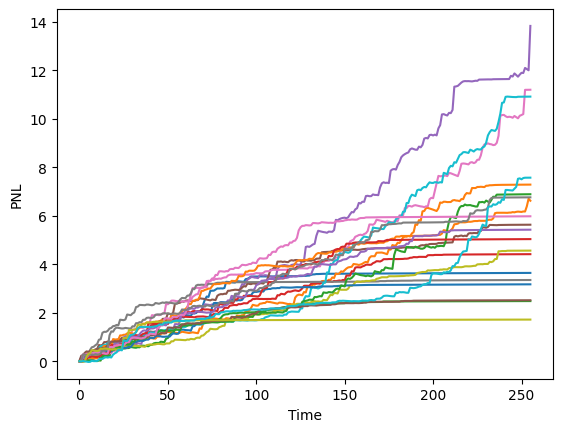

In [50]:
df = pd.DataFrame(implied_pnl['PnL'].T[:, :20])
plt.plot(df)
plt.xlabel('Time')
plt.ylabel('PNL')
plt.show()

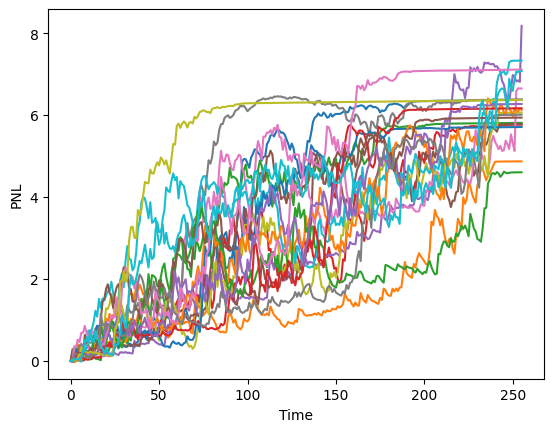

In [51]:
df = pd.DataFrame(actual_pnl['PnL'].T[:, :20])
plt.plot(df)
plt.xlabel('Time')
plt.ylabel('PNL')
plt.show()

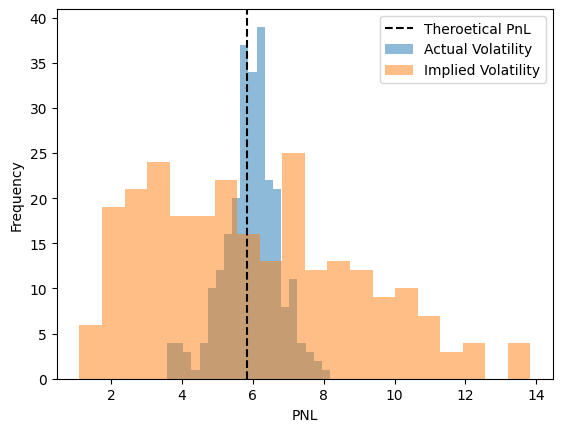

In [55]:
import matplotlib.pyplot as plt

# Get the final values from the actual PnL
final_values_actual = actual_pnl['PnL'][:, -1]

# Get the final values from the implied PnL
final_values_implied = implied_pnl['PnL'][:, -1]

# Plot the distribution of final values
plt.hist(final_values_actual, bins=20, alpha=0.5, label='Actual Volatility')
plt.hist(final_values_implied, bins=20, alpha=0.5, label='Implied Volatility')

plt.axvline(x=(bs_prc_a - bs_prc_i), color='black', linestyle='--', label='Theroetical PnL')
plt.xlabel('PNL')
plt.ylabel('Frequency')
plt.legend()
plt.show()